In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pyximport; pyximport.install()
import sys
from IPython.display import SVG

BOXSIMU_PATH = '/home/aschi/Documents/MyPrivateRepo/boxsimu_project/'
if not BOXSIMU_PATH in sys.path:
    sys.path.append(BOXSIMU_PATH)
    
import boxsimu

In [3]:
%load_ext Cython

In [23]:
# -*- coding: utf-8 -*-

import sys
import copy
import numpy as np
import datetime

from matplotlib import pyplot as plt

BOXSIMU_PATH = '/home/aschi/Documents/MyPrivateRepo/boxsimu_project/'
if not BOXSIMU_PATH in sys.path:
    sys.path.append(BOXSIMU_PATH)

from boxsimu.simulations import boxmodelsystem3

system = boxmodelsystem3.get_system()

In [24]:
system.save_as_svg('test_svg')

corners [(330.0, 0.0), (630.0, 0.0), (630.0, 300.0), (330.0, 300.0)]
corners [(330.0, 0.0), (630.0, 0.0), (630.0, 300.0), (330.0, 300.0)]
corners [(-330.0, 4.0413344371862656e-14), (-30.0, 4.0413344371862656e-14), (-30.0, 300.00000000000006), (-330.0, 300.00000000000006)]
corners [(-330.0, 4.0413344371862656e-14), (-30.0, 4.0413344371862656e-14), (-30.0, 300.00000000000006), (-330.0, 300.00000000000006)]


In [25]:
from boxsimu import dimensionality_validation
from boxsimu import ur

@dimensionality_validation.decorator_raise_if_not_mass_per_time
def random_pint_unit_function(arg1, arg2):
    return arg1 * arg2 * ur.meter

random_pint_unit_function(1*ur.kg, 1/ur.second/ur.meter)

<Quantity(1.0, 'kilogram / second')>

In [26]:
random_pint_unit_function._verified = True
random_pint_unit_function._verified

True

In [ ]:
import cProfile
import re
cProfile.run('system.solve(200*ur.month, 0.5*ur.month)', 'restats')

Start solving the box model...
- total integration time: 200 month
- dt (time step): 0.5 month
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
10.0%
40

In [ ]:
import pstats
p = pstats.Stats('restats')

In [13]:
p.strip_dirs().sort_stats(-1).print_stats()

Wed Aug 30 17:32:15 2017    restats

         35434656 function calls (35174707 primitive calls) in 36.031 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:989(_handle_fromlist)
        1    0.001    0.001   36.031   36.031 <string>:1(<module>)
        3    0.000    0.000    0.000    0.000 <string>:12(__new__)
        3    0.000    0.000    0.000    0.000 __init__.py:26(tokenizer)
   618126    0.586    0.000    1.074    0.000 __init__.py:82(_to_magnitude)
       18    0.000    0.000    0.000    0.000 _collections_abc.py:302(__subclasshook__)
       58    0.000    0.000    0.000    0.000 _collections_abc.py:392(__subclasshook__)
   341980    0.261    0.000    0.349    0.000 _collections_abc.py:672(keys)
   398818    0.302    0.000    0.399    0.000 _collections_abc.py:676(items)
   740798    0.185    0.000    0.185    0.000 _collections_abc.py:698(__i

      6/4    0.000    0.000    0.000    0.000 {built-in method builtins.format}
   754741    0.443    0.000    0.443    0.000 {built-in method builtins.getattr}
509999/408442    0.561    0.000    2.236    0.000 {built-in method builtins.hasattr}
   504932    0.155    0.000    0.155    0.000 {built-in method builtins.hash}
      997    0.000    0.000    0.000    0.000 {built-in method builtins.id}
7568433/7568171    2.326    0.000    5.033    0.000 {built-in method builtins.isinstance}
  364/146    0.000    0.000    0.002    0.000 {built-in method builtins.issubclass}
   740822    0.184    0.000    0.184    0.000 {built-in method builtins.iter}
884238/884232    0.155    0.000    0.155    0.000 {built-in method builtins.len}
    12805    0.036    0.000    0.125    0.000 {built-in method builtins.min}
       11    0.000    0.000    0.000    0.000 {built-in method builtins.ord}
     4000    0.002    0.000    0.002    0.000 {built-in method builtins.setattr}
     1614    0.006    0.000    0

In [14]:
p.sort_stats('cumulative').print_stats(10)

Wed Aug 30 17:32:15 2017    restats

         35434656 function calls (35174707 primitive calls) in 36.031 seconds

   Ordered by: cumulative time
   List reduced from 352 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   36.031   36.031 {built-in method builtins.exec}
        1    0.001    0.001   36.031   36.031 <string>:1(<module>)
        1    0.000    0.000   36.030   36.030 system.pyx:776(solve)
        1    0.058    0.058   36.030   36.030 solver.pyx:58(solve)
      400    0.092    0.000   34.332    0.086 solver.pyx:186(_calculate_changes_of_all_variables)
     1600    0.142    0.000   19.997    0.012 solver.pyx:301(_get_sink_source_reaction)
     1600    0.107    0.000   18.794    0.012 system.pyx:721(get_reaction_rate_3Darray)
     3200    0.342    0.000   18.351    0.006 system.pyx:707(get_reaction_rate_2Darray)
    25600    0.282    0.000   15.338    0.001 process.py:146(__call__)
   211604   

In [15]:
p.sort_stats('time').print_stats(10)

Wed Aug 30 17:32:15 2017    restats

         35434656 function calls (35174707 primitive calls) in 36.031 seconds

   Ordered by: internal time
   List reduced from 352 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
7568433/7568171    2.326    0.000    5.033    0.000 {built-in method builtins.isinstance}
   483726    1.754    0.000    3.266    0.000 util.py:251(__init__)
  1357867    1.580    0.000    2.707    0.000 abc.py:178(__instancecheck__)
   211604    1.512    0.000   10.967    0.000 quantity.py:746(_mul_div)
  2156336    1.126    0.000    1.126    0.000 _weakrefset.py:70(__contains__)
   156310    1.116    0.000    3.290    0.000 util.py:363(__truediv__)
  1081846    1.026    0.000    1.188    0.000 util.py:313(__eq__)
   300992    0.933    0.000    3.561    0.000 {built-in method _operator.mul}
   460430    0.917    0.000    1.963    0.000 quantity.py:85(__new__)
   150499    0.799    0.000    2.628    0.000 util.py:339(

In [17]:
%time
sol = system.solve(200*ur.month, 1*ur.month)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.3 µs
Start solving the box model...
- total integration time: 200 month
- dt (time step): 1 month
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
10.0%
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
20.0%
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
30.0%
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
40.0%
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
50.0%
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
60.0%
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
70.0%
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
80.0%
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
90.0%
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
Function "solve(...)" used 10.267s


(<matplotlib.figure.Figure at 0x7f776d8d3780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f776da23208>)

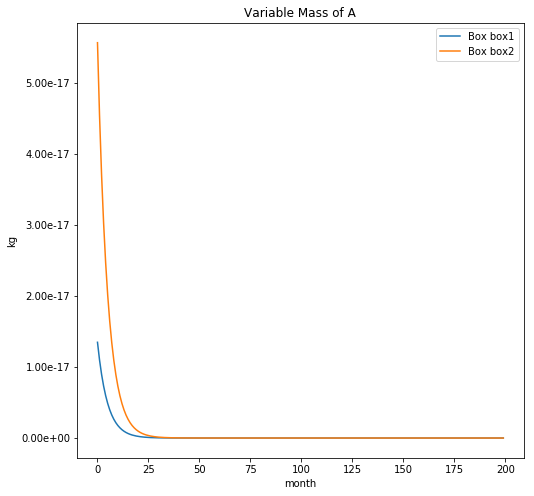

In [18]:
sol.plot_variable_mass_of_all_boxes(system.variables.A, yaxis_log=False)

(<matplotlib.figure.Figure at 0x7f776d8b0f60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f776d6d7ef0>)

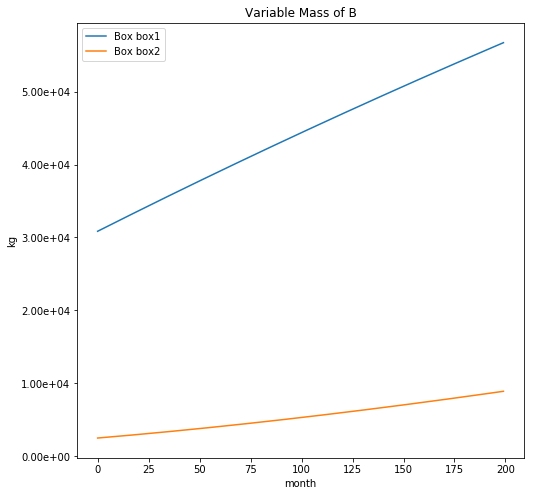

In [19]:
sol.plot_variable_mass_of_all_boxes(system.variables.B, yaxis_log=False)

(<matplotlib.figure.Figure at 0x7f776d79b320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f776d7ee860>)

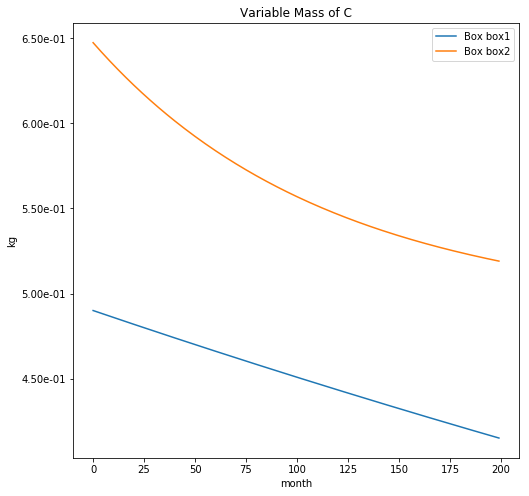

In [20]:
sol.plot_variable_mass_of_all_boxes(system.variables.C, yaxis_log=False)

(<matplotlib.figure.Figure at 0x7f776d727b00>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f776d7b45c0>)

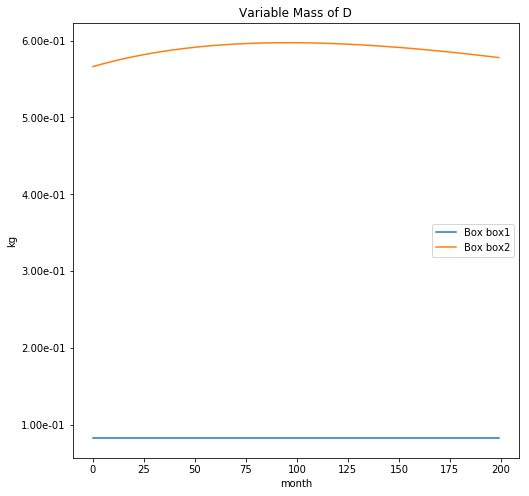

In [21]:
sol.plot_variable_mass_of_all_boxes(system.variables.D, yaxis_log=False)

(<matplotlib.figure.Figure at 0x7f776d8da940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f776d7fa2b0>)

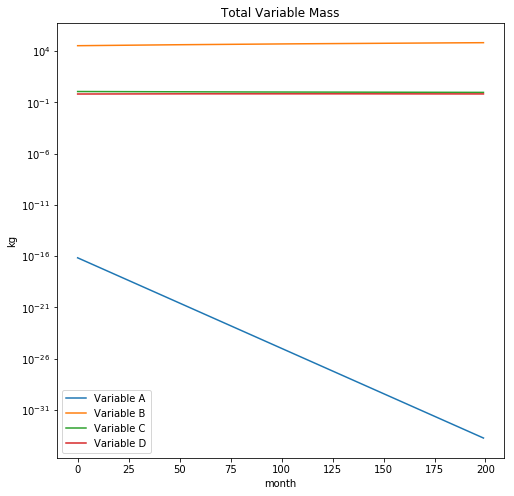

In [22]:
sol.plot_total_variable_masses()

In [62]:
system.save_as_svg('system3.svg')

corners [(330.0, 0.0), (630.0, 0.0), (630.0, 300.0), (330.0, 300.0)]
corners [(330.0, 0.0), (630.0, 0.0), (630.0, 300.0), (330.0, 300.0)]
corners [(-330.0, 4.0413344371862656e-14), (-30.0, 4.0413344371862656e-14), (-30.0, 300.00000000000006), (-330.0, 300.00000000000006)]
corners [(-330.0, 4.0413344371862656e-14), (-30.0, 4.0413344371862656e-14), (-30.0, 300.00000000000006), (-330.0, 300.00000000000006)]


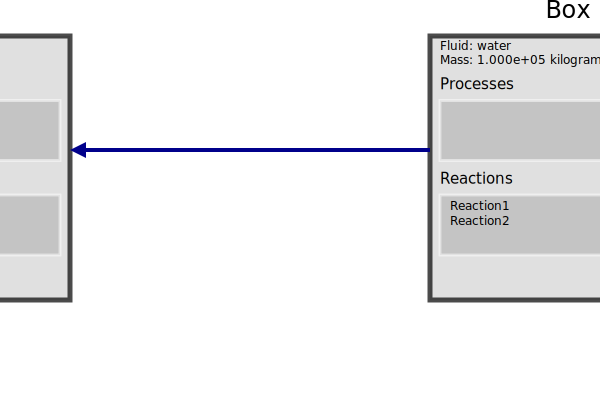

In [63]:
SVG('system3.svg')

In [32]:
f1 = boxsimu.entities.Fluid('fluid1', rho=1000*ur.kg/ur.meter**3)
f2 = boxsimu.entities.Fluid('fluid2', rho=100*ur.kg/ur.meter**3)

In [33]:
qf1 = f1.q(1000*ur.kg)

In [38]:
qf2 = f2.q(1*ur.gram)

In [39]:
qf2.mass

<Quantity(0.001, 'kilogram')>